# Explore here

**<span style="color:#004080;">ADVANCED FORECASTING OF VARIABLE RENEWABLE POWER GENERATION</span>**


**<span style="color:#004080;">"Weather directly impacts renewable energy generation. We are going to find the key to unlocking those secrets."</span>**




**<span style="color:black;">We introduce ourselves:</span>**  
**<span style="color:black;">Olga</span>**  
**<span style="color:black;">Javier</span>**  
**<span style="color:black;">Fernando</span>**

In [5]:
# Your code here
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [6]:
# Your code here
import pandas as pd

dataset = pd.read_csv('../data/raw/Renewable.csv')
dataset

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


In [3]:
import requests
import time

# Seleccionar el recurso a descargar
url = "https://www.kaggle.com/datasets/pythonafroz/renewable-power-generation-and-weather-conditions/data"


# Petición para descargar el fichero de Internet
response = requests.get(url)

# Si la petición se ha ejecutado correctamente (código 200), entonces el fichero se ha podido descargar
if response:
    # Se almacena el archivo en el directorio actual para usarlo más tarde
    with open("../data/raw/Renewable1.csv", "wb") as dataset:
        dataset.write(response.content)

In [ ]:
import requests
import time

# url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# html_page = requests.get(url, time.sleep(10)).text

# If not information is extracted, then connect as anonymous
# if "We do not allow automated access to our servers" in html_page:
    # headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    # request = requests.get(url, headers = headers)
    # time.sleep(10)
    # html_page = request.text

# html_page

In [9]:
# Your code here
import pandas as pd

dataset1 = pd.read_csv('../data/raw/Renewable1.csv')
dataset1

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


#### Paso 2. Exploración y limpieza superficial

##### 1. Dimensiones del problema

In [ ]:
dataset.shape

(196776, 17)

**<span style="color:black;">The shape attribute in Python is used to get the dimensions of an array or DataFrame. In this case, the dataset has </span>**  
**<span style="color:black;">196,776 rows and 17 columns.</span>** 

##### 2. Valores nulos / no nulos

In [ ]:
dataset.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [ ]:
print("From Time : ",dataset['Time'].min())
print("To Time   : ",dataset['Time'].max())

From Time :  2017-01-01 00:00:00
To Time   :  2022-08-31 17:45:00


In [ ]:
# Obtener los nombres de las columnas
column_names = dataset.columns

# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
for column_name in column_names:
    print(column_name)

# Imprimir el contenido del conjunto de datos línea por línea
# print("\nContenido del conjunto de datos:")
# for index, row in dataset.iterrows():
    # print(row)

Nombres de las columnas:
Time
Energy delta[Wh]
GHI
temp
pressure
humidity
wind_speed
rain_1h
snow_1h
clouds_all
isSun
sunlightTime
dayLength
SunlightTime/daylength
weather_type
hour
month


In [ ]:
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset.head(20)

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
5,2017-01-01 01:15:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
6,2017-01-01 01:30:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
7,2017-01-01 01:45:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1
8,2017-01-01 02:00:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1
9,2017-01-01 02:15:00,0,0.0,1.9,1020,100,5.5,0.0,0.0,100,0,0,450,0.0,4,2,1


In [ ]:
dataset =dataset[dataset['Energy delta[Wh]'] != 0]
dataset.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
32,2017-01-01 08:00:00,5,10.6,3.5,1016,99,6.0,0.0,0.0,98,1,60,450,0.13,4,8,1
33,2017-01-01 08:15:00,33,6.0,3.5,1016,99,6.0,0.0,0.0,98,1,75,450,0.17,4,8,1
34,2017-01-01 08:30:00,44,2.8,3.5,1016,99,6.0,0.0,0.0,98,1,90,450,0.20,4,8,1
35,2017-01-01 08:45:00,61,3.1,3.5,1016,99,6.0,0.0,0.0,98,1,105,450,0.23,4,8,1
36,2017-01-01 09:00:00,65,3.5,3.6,1016,97,6.2,0.0,0.0,100,1,120,450,0.27,4,9,1




Filtrar el conjunto de datos: Utiliza la función de indexación booleana para seleccionar solo las filas del conjunto de datos donde el valor en la columna "Energy delta[Wh]" es distinto de cero. Esto significa que elimina todas las filas donde no hay un cambio en la energía, es decir, donde la energía delta es cero.
Mostrar las primeras filas del conjunto de datos resultante: Utiliza el método head() para mostrar las primeras filas del conjunto de datos después de aplicar el filtro. Esto proporciona una vista previa de cómo se ve el conjunto de datos después de la eliminación de las filas con energía delta cero.

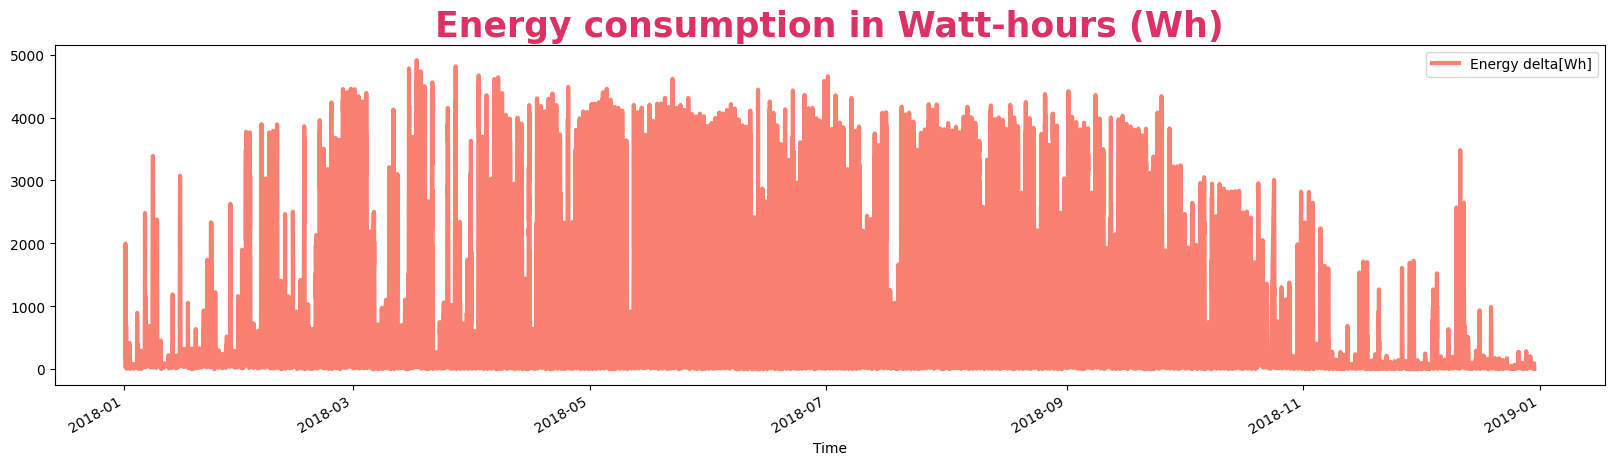

In [ ]:
dataset1 = dataset[['Time','Energy delta[Wh]']].copy('Deep')
dataset1 = dataset1.set_index('Time')
dataset_2018 =dataset1[(dataset1.index >= '2018-01-01') & (dataset1.index < '2018-12-31')]
dataset_2018.plot(figsize=(20,5), lw=3,color = '#FA8072')
plt.title('Energy consumption in Watt-hours (Wh)', weight='bold', fontsize=25,color = '#DE3163'); 

Visualización: Trama el DataFrame dataset_2018 con el tiempo en el eje x y el cambio de energía en el eje y. Se especifica el tamaño de la figura (figsize), el grosor de la línea (lw), y el color de la línea. Además, se agrega un título a la gráfica para indicar que muestra el consumo de energía en vatios-hora durante el año 2018

In [ ]:
# Obtener el contenido de la columna "weather_type"
weather_type_column = dataset['weather_type']

# Imprimir los valores únicos en la columna "weather_type"
unique_weather_types = weather_type_column.unique()
print("Valores únicos en la columna 'weather_type':")
for weather_type in unique_weather_types:
    print(weather_type)

Valores únicos en la columna 'weather_type':
4
3
5
2
1


In [ ]:
# Acceder a la columna "isSun" y mostrar sus valores
isSun_column = dataset['isSun']
print(isSun_column)

32        1
33        1
34        1
35        1
36        1
         ..
196770    1
196771    1
196772    1
196773    1
196774    1
Name: isSun, Length: 95926, dtype: int64


In [ ]:
dataset .info()

<class 'pandas.core.frame.DataFrame'>
Index: 95926 entries, 32 to 196774
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Time                    95926 non-null  datetime64[ns]
 1   Energy delta[Wh]        95926 non-null  int64         
 2   GHI                     95926 non-null  float64       
 3   temp                    95926 non-null  float64       
 4   pressure                95926 non-null  int64         
 5   humidity                95926 non-null  int64         
 6   wind_speed              95926 non-null  float64       
 7   rain_1h                 95926 non-null  float64       
 8   snow_1h                 95926 non-null  float64       
 9   clouds_all              95926 non-null  int64         
 10  isSun                   95926 non-null  int64         
 11  sunlightTime            95926 non-null  int64         
 12  dayLength               95926 non-null  int64    

In [ ]:
dataset.isnull().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

In [ ]:
# Verificar si hay duplicados en el DataFrame
duplicates = dataset.duplicated().any()

# Imprimir el resultado
if duplicates:
    print("El DataFrame tiene duplicados.")
else:
    print("\033[94mEl DataFrame no tiene duplicados.\033[0m")

El DataFrame no tiene duplicados.


In [ ]:
 dataset.describe()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,95926,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000,95926.0,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000,95926.000000
mean,2019-11-10 05:50:44.806413312,1175.429675,65.974004,12.709091,1015.611211,73.151085,4.081135,0.073496,0.004243,64.940037,1.0,417.549205,804.853689,0.519968,3.195474,10.625826,6.202291
min,2017-01-01 08:00:00,1.000000,0.000000,-16.000000,978.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.0,15.000000,450.000000,0.010000,1.000000,2.000000,1.000000
25%,2018-06-10 08:48:45,178.000000,16.500000,6.400000,1011.000000,60.000000,2.800000,0.000000,0.000000,34.000000,1.0,210.000000,660.000000,0.280000,2.000000,8.000000,4.000000
50%,2019-10-22 10:37:30,614.000000,48.100000,13.200000,1016.000000,75.000000,3.900000,0.000000,0.000000,79.000000,1.0,390.000000,840.000000,0.520000,4.000000,11.000000,6.000000
75%,2021-04-30 08:26:15,1967.000000,104.800000,18.800000,1021.000000,88.000000,5.200000,0.000000,0.000000,99.000000,1.0,600.000000,975.000000,0.760000,4.000000,14.000000,8.000000
max,2022-08-31 17:30:00,5020.000000,229.200000,35.800000,1046.000000,100.000000,13.600000,7.310000,2.820000,100.000000,1.0,1020.000000,1020.000000,1.000000,5.000000,19.000000,12.000000
std,NaN,1237.437364,57.680811,8.148321,8.860737,16.921246,1.822515,0.302578,0.055998,36.171633,0.0,247.082584,182.439487,0.276001,1.291893,3.837256,2.906729


In [ ]:
# Paso 1: Identificar columnas categóricas
columnas_categoricas =  dataset.select_dtypes(include=['object']).columns
columnas_categoricas

Index([], dtype='object')

In [ ]:
# Eliminar la columna "isSun" del DataFrame
dataset.drop(columns=['isSun'], inplace=True)

/tmp/ipykernel_6465/2780653471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['isSun'], inplace=True)


**<span style="color:#004080;">Todas columnas son Numericas</span>**

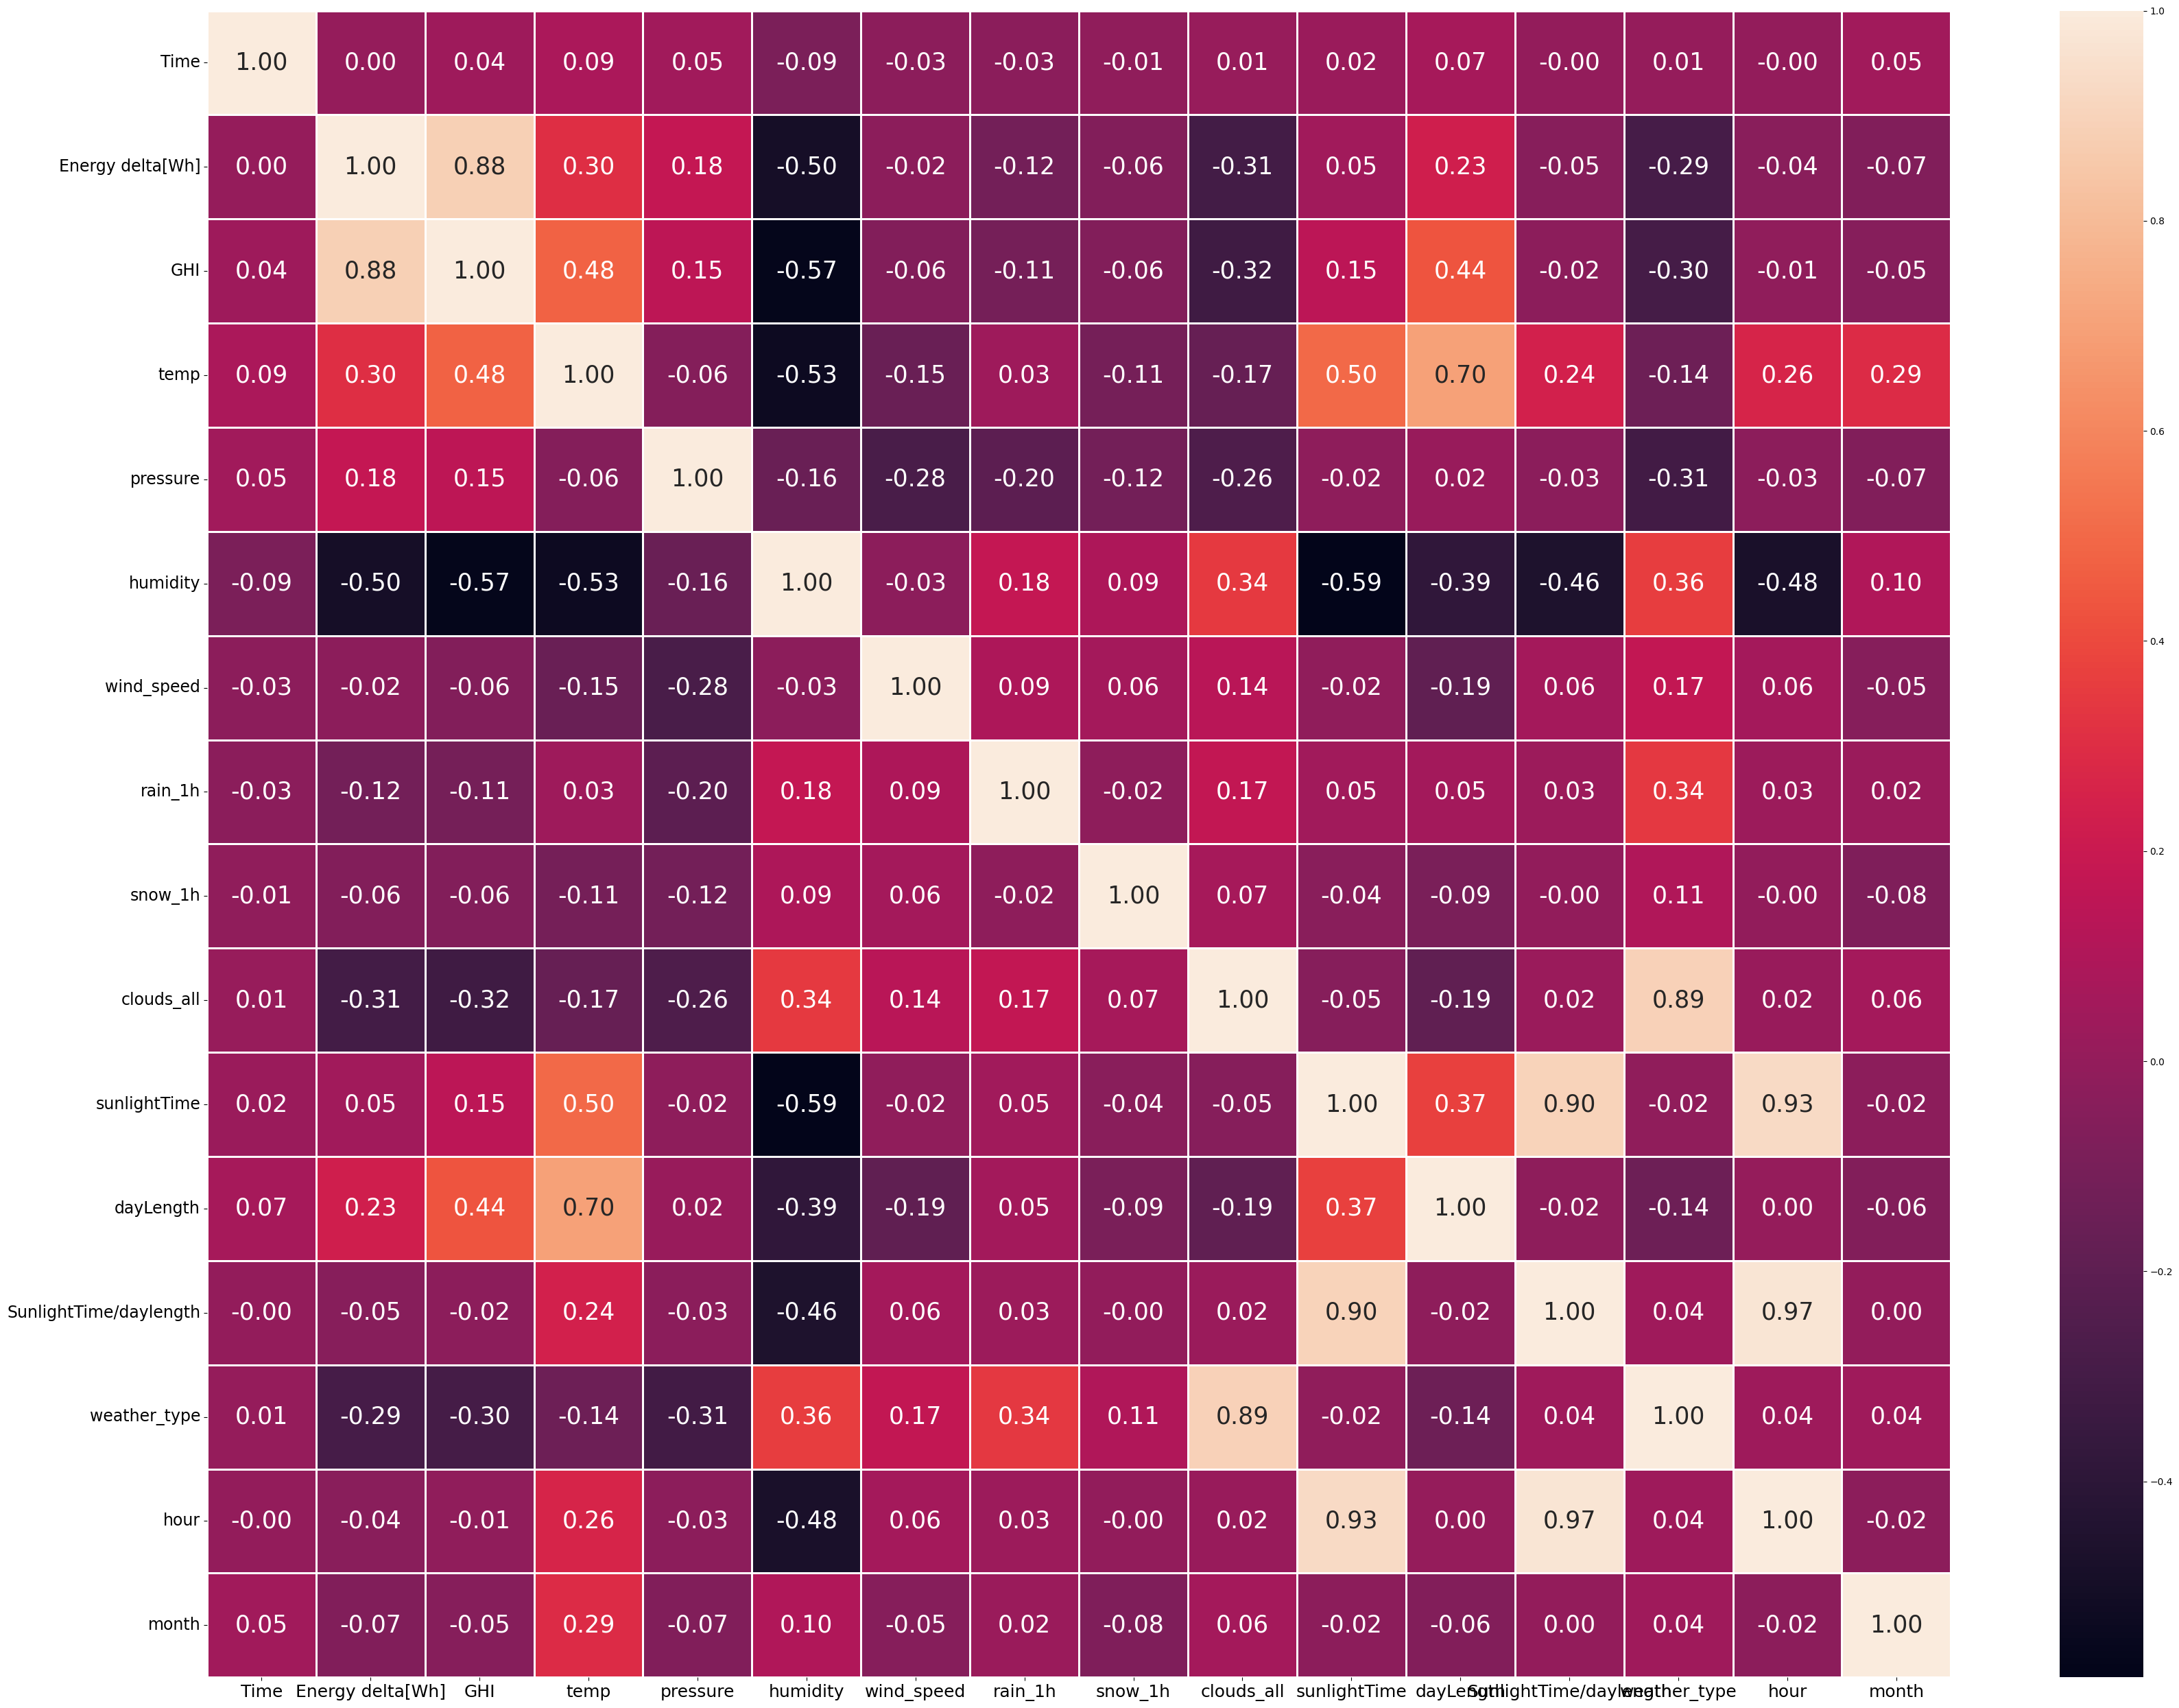

In [ ]:
#correlacion


correlation_matrix = dataset.corr()

# Visualizar la matriz de correlación usando un heatmap
fig, axis = plt.subplots(figsize=(35,25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linecolor='white', linewidths=1, annot_kws={"size": 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.tight_layout()
plt.show()

**There are strong negative relation between**
- **Energy delta-Huidity(-0.50)**
- **Ght-Huidity(-0.57)**
- **Temp-Huidity(-0.53)**
- **Pressure-Huidity(-0.16)**
- **Hour-Huidity(-0.48)**
- **SunlightTime-Huidity(-0.59)**
- **day Lenghht-Huidity(-0.39)**

**There are strong Positive  relation between**
- **Ghi-Energy(0,88)**
- **Temp-Energy(0,30)**
- **Pressure-Energy(0,18)**
- **DayLenght-Energy(0,23)**



**<span style="color:#004080;">GHI significa "Global Horizontal Irradiance"</span>**

**<span style="color:#004080;">Global Horizontal Irradiance" en inglés, que se traduce al español como "Irradiancia Global Horizontal". Es una medida de la cantidad de radiación solar que llega a la superficie de la Tierra horizontalmente en un área determinada durante un período específico de tiempo. La unidad de medida típica para GHI es Watts por metro cuadrado (W/m²)."</span>**

**<span style="color:#004080;">En el contexto de tu conjunto de datos sobre generación de energía renovable y condiciones meteorológicas, es probable que la columna "GHI" represente la irradiancia solar medida en la ubicación específica de tus datos. Esta medida es importante porque la cantidad de radiación solar incidente puede afectar significativamente la generación de energía solar."</span>**

**There are strong Positive  relation between**
- **Ghi-Energy(0,88)**
- **Ghi-temp(0,48)**
- **Ghi-sunlight(0,15)**
- **Ghi-daylenght(0,44)**


**La columna wing_speed podemos eliminar?**no la veo importancia